In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square_signal(x):
    if x % 2 > 1:
        return 1
    else:
        return -1

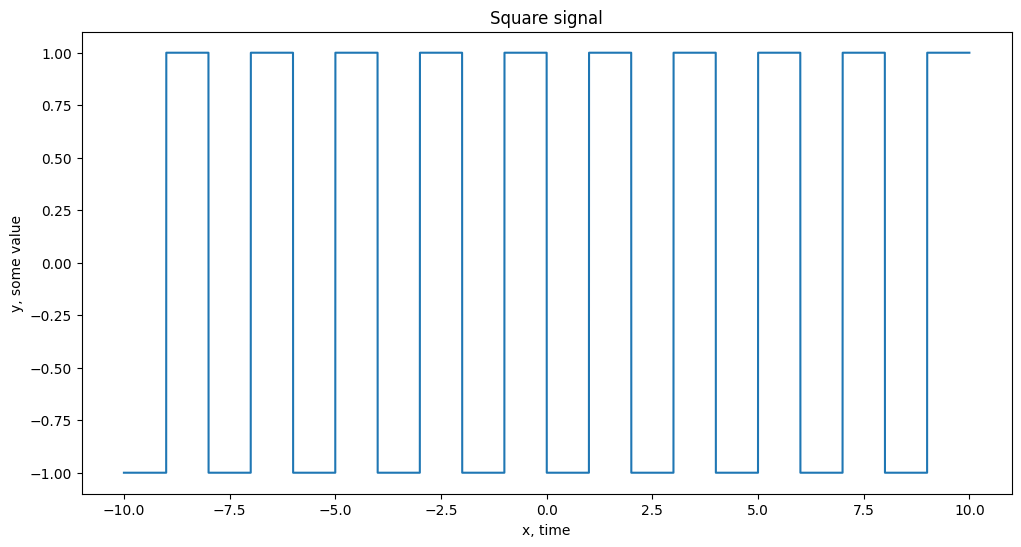

In [3]:
square_args = np.arange(-10, 10, 1 / 2000)
square_y = [square_signal(arg) for arg in square_args]

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.title("Square signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [4]:
def kernel(x):
    return 0.003 * np.exp(-(x ** 2))

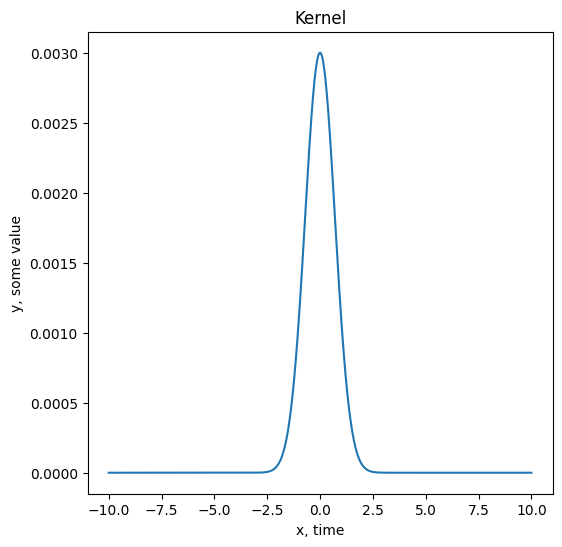

In [5]:
kernel_args = np.arange(-10, 10, 1 / 2000)
kernel_y = kernel(kernel_args)

plt.figure(figsize=(6, 6))
plt.plot(kernel_args, kernel_y)
plt.title("Kernel")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

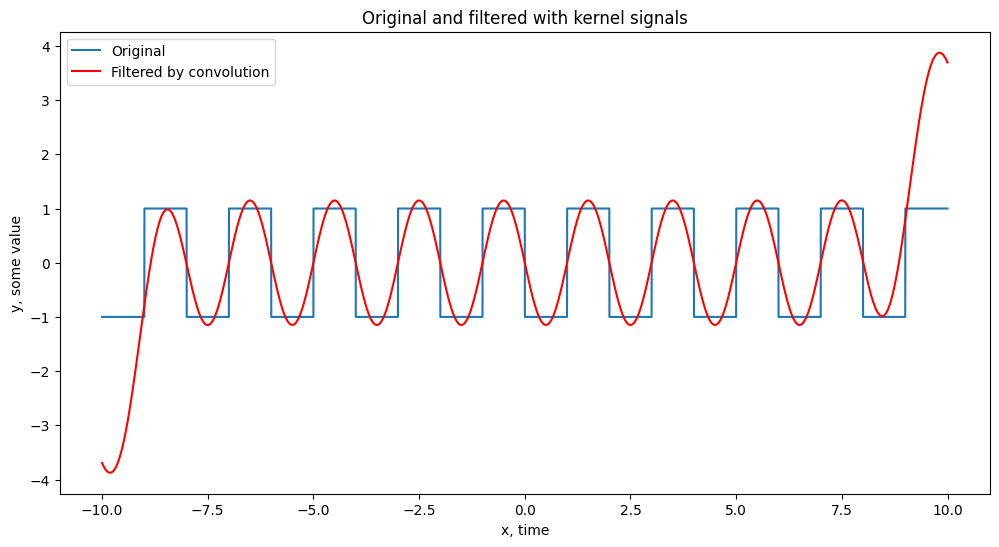

In [6]:
conv_y = np.convolve(square_y, kernel_y)

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.plot(square_args, conv_y[20000:-19999], 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])
plt.show()

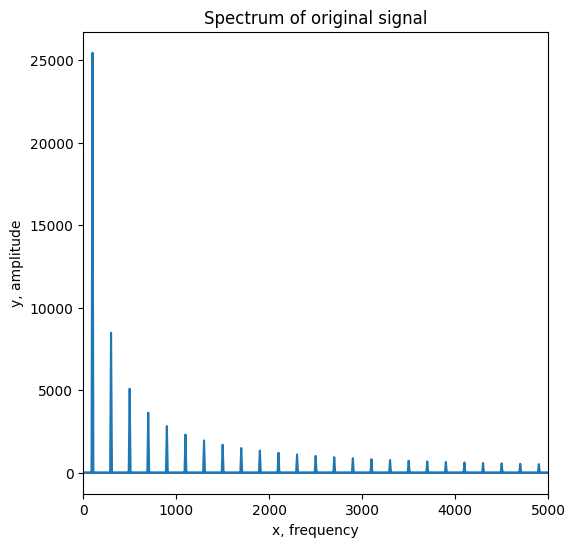

In [7]:
square_fft_freqs = np.fft.fftfreq(len(square_args), 0.1 / len(square_args))
square_fft_y = np.fft.fft(square_y)

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(square_fft_y))
plt.xlim([0, 5000])
plt.title("Spectrum of original signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

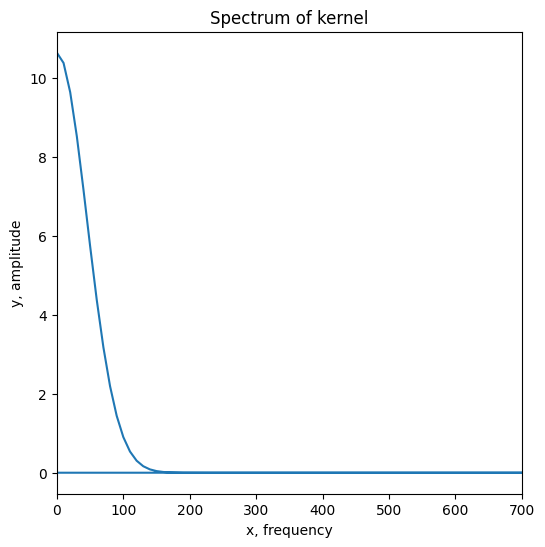

In [8]:
kernel_fft_y = np.fft.fft(kernel_y)

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(kernel_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of kernel")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

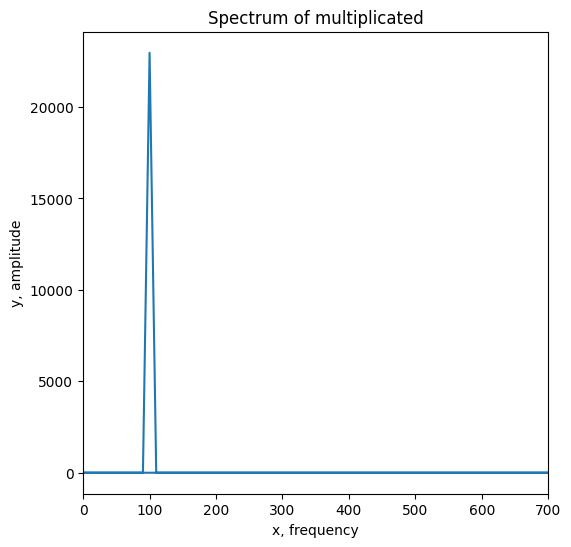

In [9]:
multiplication_fft_y = square_fft_y * kernel_fft_y

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(multiplication_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of multiplicated")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


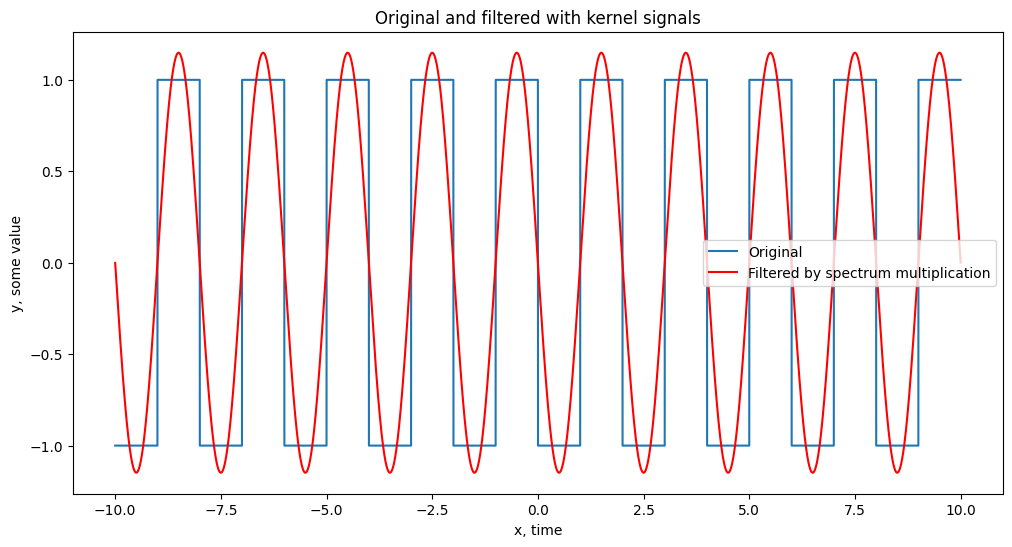

In [10]:
multiplication_from_ifft_y = np.fft.ifft(multiplication_fft_y)

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.plot(square_args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()

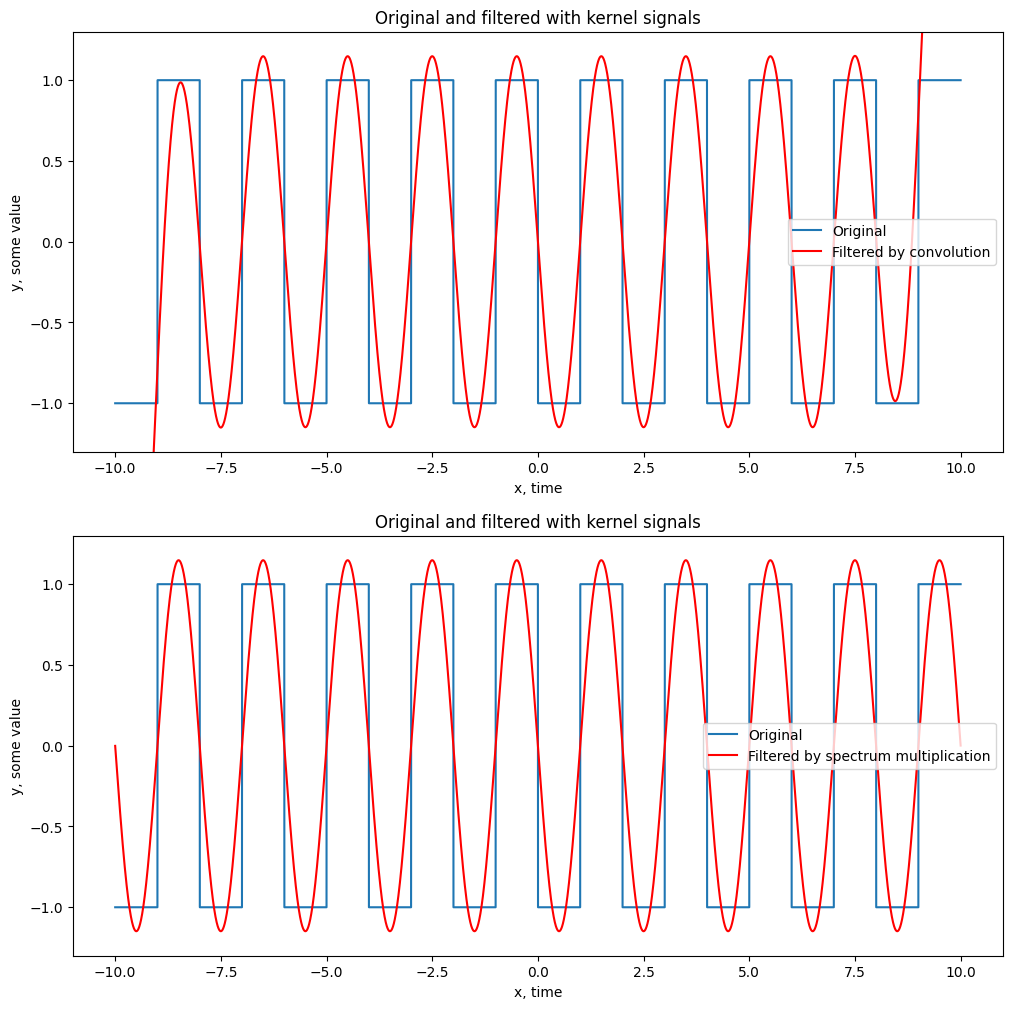

In [11]:
plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.ylim([-1.3, 1.3])
plt.plot(square_args, square_y)
plt.plot(square_args, conv_y[20000:-19999], 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])

plt.subplot(212)
plt.ylim([-1.3, 1.3])
plt.plot(square_args, square_y)
plt.plot(square_args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()

In [14]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    f_3 = 450
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    w_3 = 2 * np.pi * f_3
    return np.cos(w_1 * x) + np.cos(w_2 * x) + np.cos(w_3 * x)

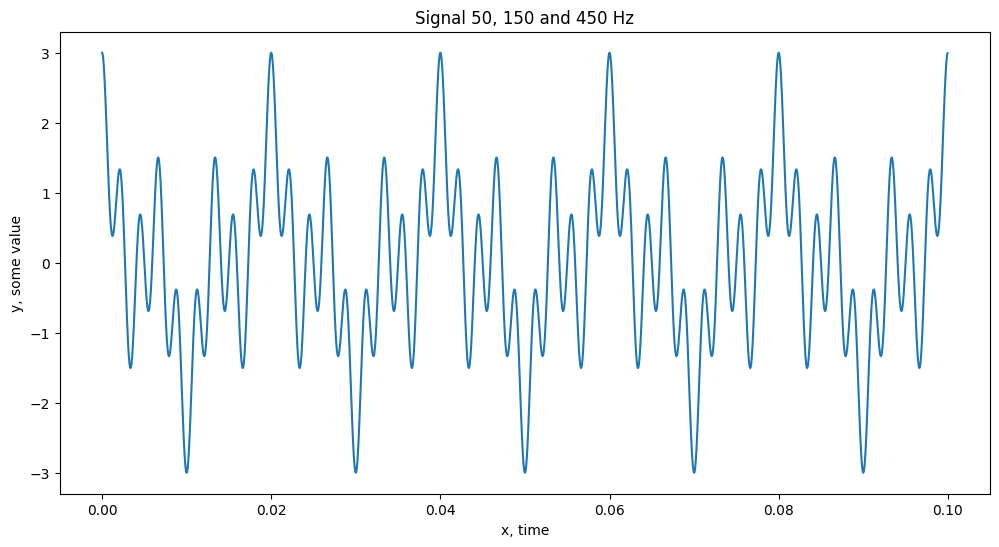

In [15]:
cos_args = np.arange(0, 0.1, 2 / 50000)
y_cos = cos_func(cos_args)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.title("Signal 50, 150 and 450 Hz")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [16]:
def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

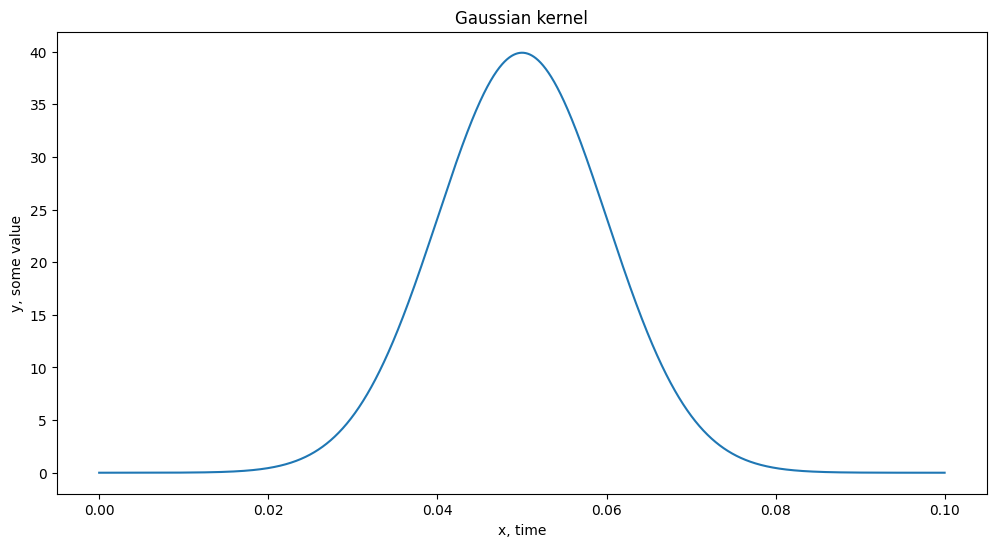

In [21]:
y_gauss = gaussian(cos_args, 0.05, 0.01)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_gauss)
plt.title("Gaussian kernel")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()